In [51]:
import math
import random
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv("data.csv")

In [5]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
Q1=df.quantile(0.25,numeric_only=True)
Q3=df.quantile(0.75,numeric_only=True)
IQR=Q3-Q1
print(IQR)


Year                    9.00
Engine HP             130.00
Engine Cylinders        2.00
Number of Doors         2.00
highway MPG             8.00
city mpg                6.00
Popularity           1460.00
MSRP                21231.25
dtype: float64


In [7]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:",duplicate_rows_df.shape)
df.head(1)

number of duplicate rows: (715, 16)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [8]:
df=df.drop(['Engine Fuel Type','Market Category','Popularity','Vehicle Style','Vehicle Size','Number of Doors'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Driven_Wheels      11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
 9   MSRP               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:",duplicate_rows_df.shape)


number of duplicate rows: (989, 10)


In [10]:
# print(df.isnull().sum())
df2=df.rename(columns={"make":"maker", "Engine HP":"Engine_HP","Engine Cylinders":"Engine_Cylinders","Transmission Type":"Transmission_Type","highway MPG":"highway_MPG","city mpg":"city_mpg"})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine_HP          11845 non-null  float64
 4   Engine_Cylinders   11884 non-null  float64
 5   Transmission_Type  11914 non-null  object 
 6   Driven_Wheels      11914 non-null  object 
 7   highway_MPG        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   MSRP               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [11]:
df2=df2.drop_duplicates()
df2.count()

Make                 10925
Model                10925
Year                 10925
Engine_HP            10856
Engine_Cylinders     10895
Transmission_Type    10925
Driven_Wheels        10925
highway_MPG          10925
city_mpg             10925
MSRP                 10925
dtype: int64

In [12]:
df2=df2.dropna()
df2.shape

(10827, 10)

In [13]:
Q1=df2.quantile(0.25,numeric_only=True)
Q3=df2.quantile(0.75,numeric_only=True)
IQR=Q3-Q1
print(IQR)


Year                    9.0
Engine_HP             130.0
Engine_Cylinders        2.0
highway_MPG             8.0
city_mpg                6.0
MSRP                21327.5
dtype: float64


In [14]:
df2.head(1)

,Make,Model,Year,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,highway_MPG,city_mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135


In [28]:
df2_col1=df2['Engine_HP']
df2_col2=df2['MSRP']
df2['profit']=df2_col1*df2_col2
df2


,Make,Model,Year,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,highway_MPG,city_mpg,MSRP,profit
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135,15455225.0
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650,12195000.0
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350,10905000.0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450,6773500.0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500,7935000.0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120,13836000.0
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670,17001000.0
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620,15186000.0
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920,15276000.0


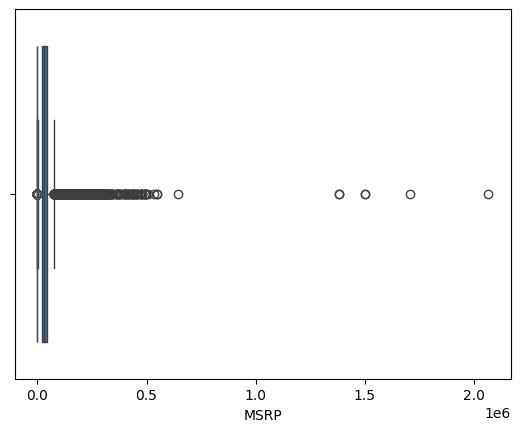

In [53]:
sns.boxplot(x=df2['Engine_Cylinders'])
plt.show()

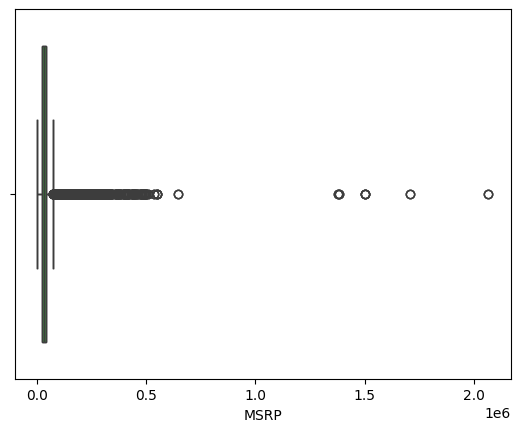

In [47]:
sns.boxplot(x=df2['MSRP'])
plt.show()

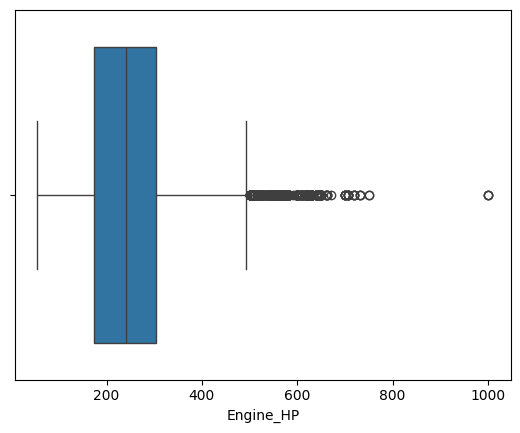

In [48]:
sns.boxplot(x=df2['Engine_HP'])
plt.show()

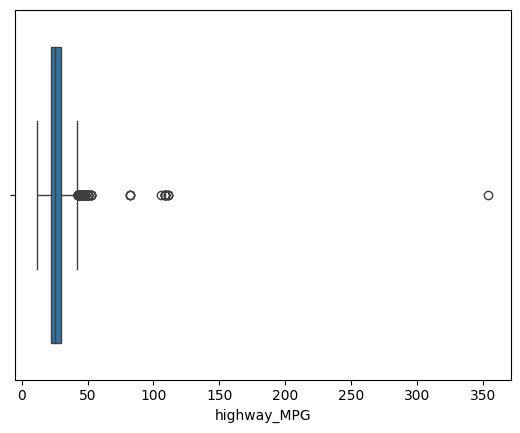

In [49]:
sns.boxplot(x=df2['highway_MPG'])
plt.show()

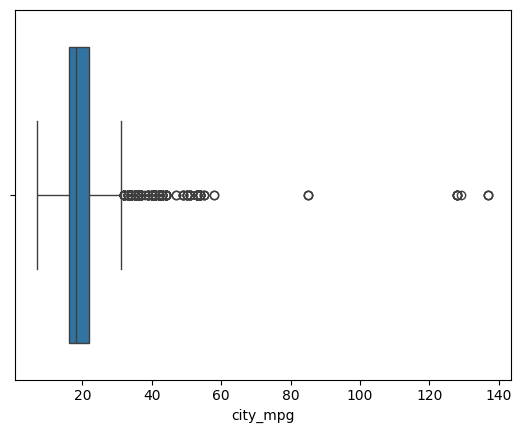

In [50]:
sns.boxplot(x=df2['city_mpg'])
plt.show()

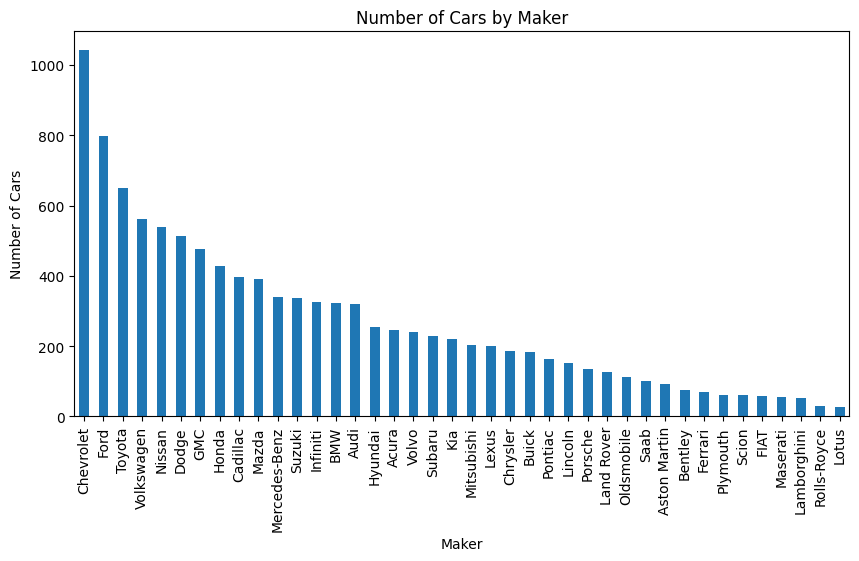

In [66]:
df2.Make.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("Number of Cars by Maker")
plt.xlabel('Maker')
plt.ylabel('Number of Cars')
plt.show()

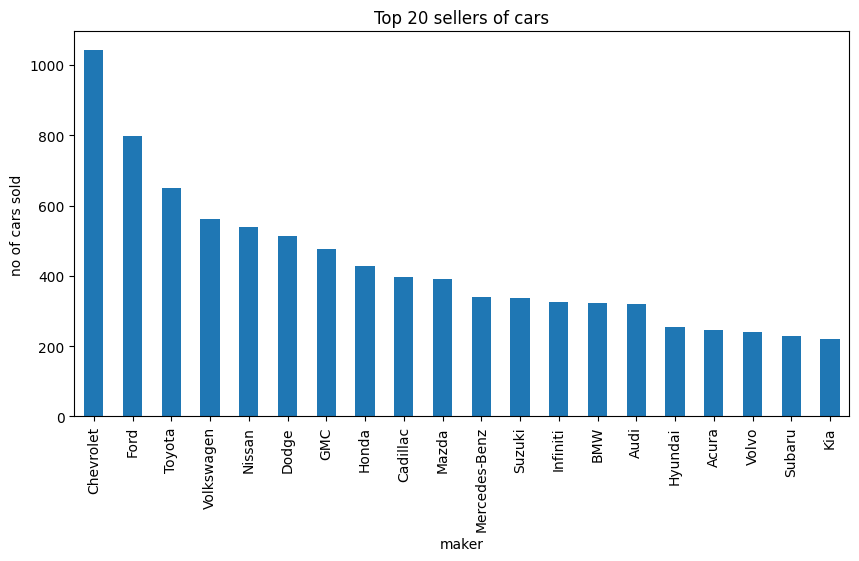

In [68]:
df2.Make.value_counts().nlargest(20).plot(kind='bar',figsize=(10,5))
plt.title('Top 20 sellers of cars')
plt.xlabel('maker')
plt.ylabel('no of cars sold')
plt.show()

 heat maps - univariate analysis
 types of analysis- Univariate , Bivariate, Multivariate analysis

In [81]:
# plt.figure(figsize=(10,5))
# c=df2.corr()
# sns.heatmap(c,cmap="BrBG",annot=True)
# c
df2.info()
# df2=df2.drop(['Make','Model','Transmission_Type','Driven_Wheels'],axis=1)


<class 'pandas.core.frame.DataFrame'>
Index: 10827 entries, 0 to 11913
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              10827 non-null  int64  
 1   Engine_HP         10827 non-null  float64
 2   Engine_Cylinders  10827 non-null  float64
 3   highway_MPG       10827 non-null  int64  
 4   city_mpg          10827 non-null  int64  
 5   MSRP              10827 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 850.1 KB


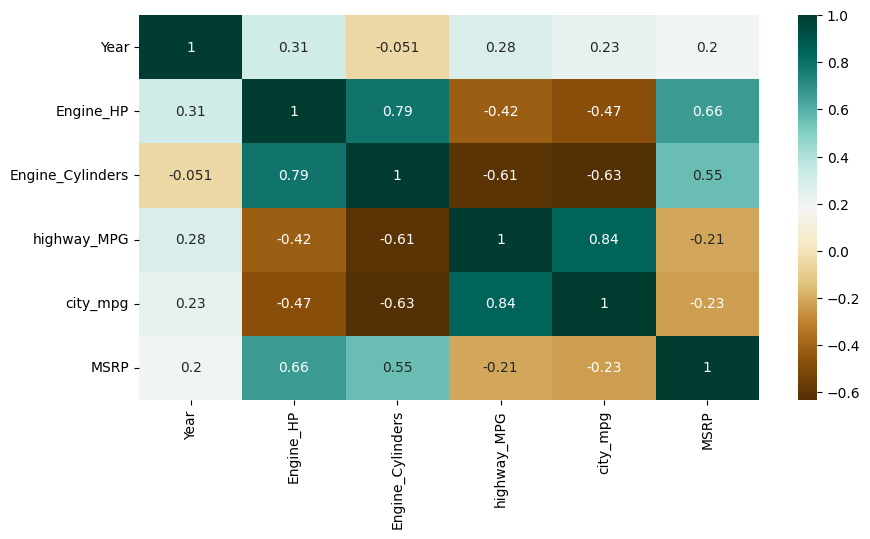

In [84]:
plt.figure(figsize=(10,5))
c=df2.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
plt.show()

machine learning 

regression - prediction/classification of numerical value

types of ML algos- supervised and unsupervised

supervised-prior info present ,ie we know label,target,etc.
unsupervised-no prior information, we just find similarities in this type.

supervised types - regression type, classifiction type 
unsupervised types- clustering

regression algos are used to predict an absolute point or integer value 

to identify class ie choosing from given options- we use classification algorithm

regression types - linear,polynomial

linear regression steps of implementation- importing req library (scikitlearn), gathering the preprocessed data , choosing the right model , define our target(y) value and our input features(x),splitting and defining what would be our training set and what would be our testing set in our data,we divide the whole data into four parts and define it as variable as x_train, y_train, x_test, y_test, to train our model we use x_train and y_train, validating our model by testing, model evaluation(check accuracy,precision,recall), visualtization 

one target and one feature-simple lineaar regression
one target and multiple features-multiple lineaar regression
70-85% data is used for training whereas 15-10% is for testing



important steps: handling missing values - fill in or remove,feature scaling-standardize numerical value,..

male a scatter plot which has a fitting line - fitting line makes min dist from data point

model evaluation-error / accuracy

even for classifictsion algo we construct two clusters using a scatter plot

common evaluation metric:accuracy- TP+TN/total ,precision - TP/(TP+FN),recall- Tp/(TP/FN),F1-:wieghted avg of precision and recall

challeneges in supervised learning- overfitted(always gives 100% accuracy),underfitting(),data quality,feature engineering

hyper parameter tuning- process of finding and removing data


In [35]:
df=pd.read_csv("Student_Performance.csv")

In [47]:

df=df.rename(columns={"Hours Studied":"Hours_Studied","Previous Scores":"Previous_Scores","Extracurricular Activities":"Extracurricular_Activities","Sleep Hours":"Sleep_Hours","Sample Question Papers Practiced" : "Sample_Question_Papers_Practiced","Performance Index":"Performance_Index"})

In [53]:
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
#changing values in the coloumn into numeric values so that we can then have no issues in processing it 


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Extracurricular_Activities= le.fit_transform(df.Extracurricular_Activities)
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


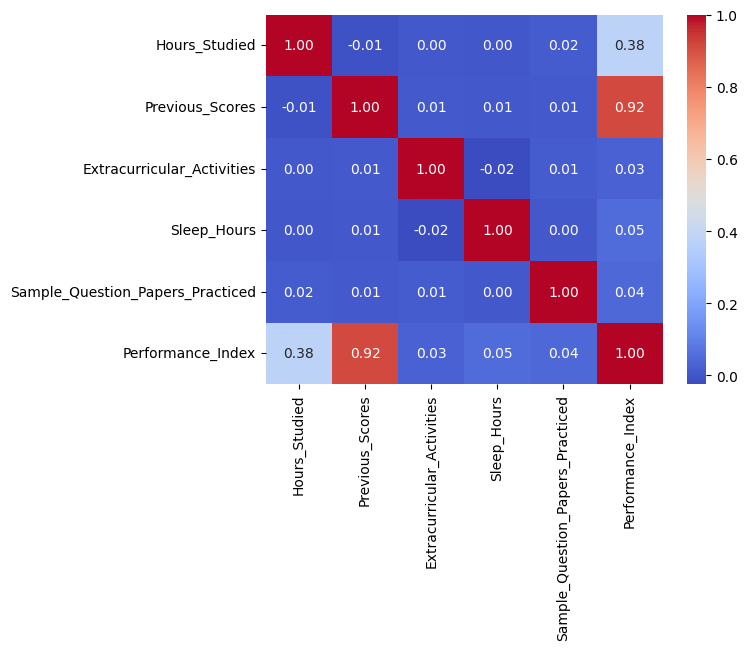

In [64]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix, annot=True, cmap ='coolwarm',fmt=".2f")
plt.show()

In [65]:
x=df['Previous_Scores']
y=df['Performance_Index']

In [68]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25)


In [69]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [70]:
lr.fit(x_train.values.reshape(-1,1),y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
y_pred= lr.predict(x_test.values.reshape(-1,1))

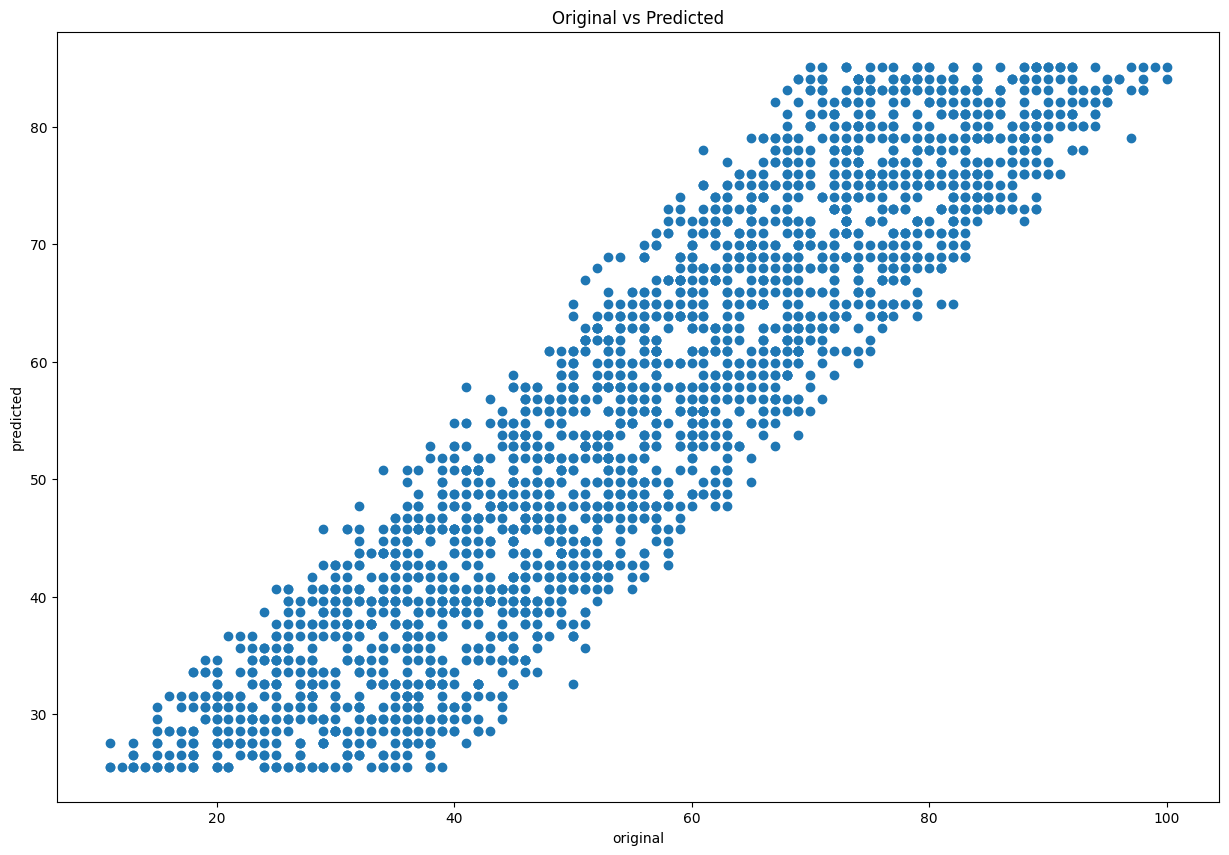

In [80]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('original')
plt.ylabel('predicted')
plt.title('Original vs Predicted')
plt.show()